https://github.com/ytongcs/Lab_4.git

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 

1. Read in both the microarray data (NCI60_data.csv) and the labels of the cancer type (NCI60_labs.csv). 

In [2]:
NCI60_data= pd.read_csv("./data/NCI60_data.csv")
NCI60_labs= pd.read_csv("./data/NCI60_labs.csv")

2. We will first do a PCA analysis. Scale, perform PCA, and plot the variance explained and the cumulative variance explained by the PCs. How many PCs are produced in the analysis? Approximately how many PCs are required to explain 90% of the variance in the data? 

In [16]:
NCI60_data.drop('Unnamed: 0',axis=1, inplace = True)

Text(0, 0.5, 'cumulative explained variance')

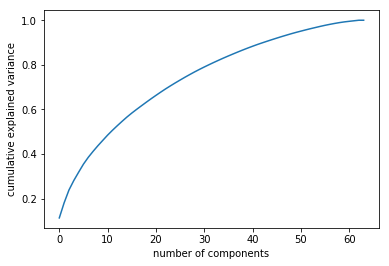

In [24]:
scale = StandardScaler()
X_scale = scale.fit_transform(NCI60_data)

pca = PCA().fit(X_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:
pca.explained_variance_ratio_.shape

(64,)

64 PCs are produced in the analysis. Approximately 50 PCs are required to explain 90% of the variance in the data.

3. Plot the scores on the first versus second PC and the scores on the first versus third PC.  Color the scores by cancer type. Interpret your results.

In [28]:
pca = PCA(3)
pca.fit(X_scale)
X_PCA = pca.transform(X_scale)
pca.explained_variance_ratio_

array([0.11358942, 0.06756203, 0.05751841])

In [35]:
df1 = pd.DataFrame({'x': X_PCA[:,0], 'y':X_PCA[:,1], 'label':NCI60_labs['x']})
df2 = pd.DataFrame({'x': X_PCA[:,0], 'y':X_PCA[:,2], 'label':NCI60_labs['x']})

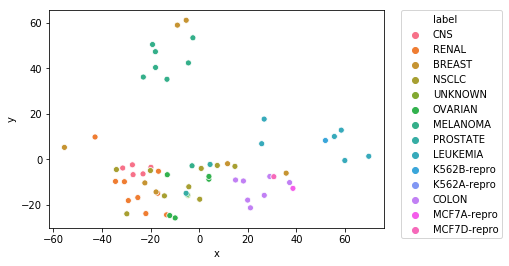

In [40]:
sns.scatterplot(x="x", y="y",hue="label",data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

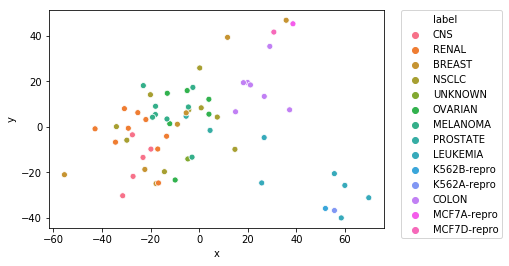

In [41]:
sns.scatterplot(x="x", y="y",hue="label",data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 4. Next we will perform clustering on the data. Visualize the dendogram for hierarchical clustering with complete, average, and single linkage. Label the dendogram with the cancer types. Does the choice of linkage impact the results? 

**Complete**

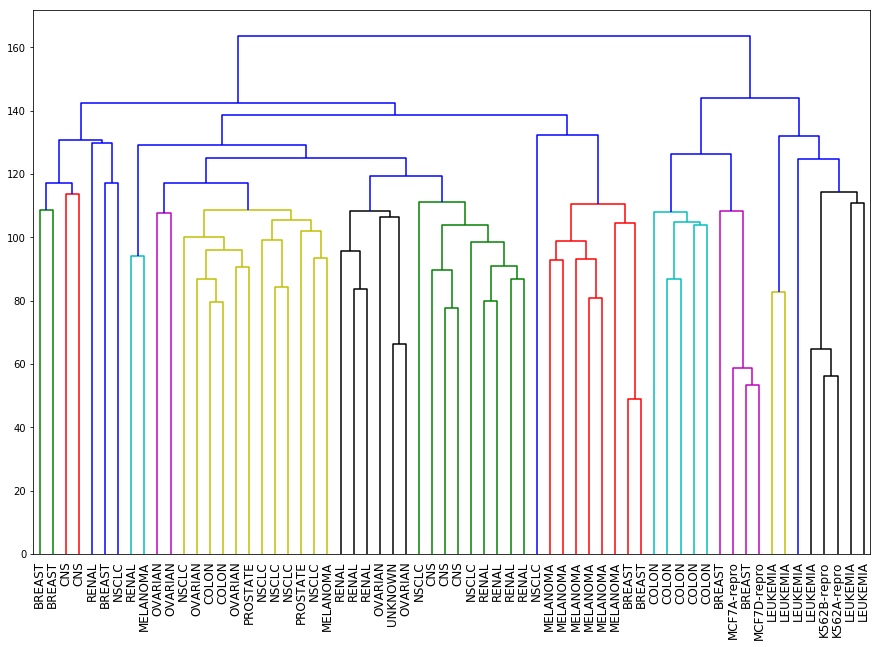

In [85]:
df1.index=df1.label
plt.figure(figsize=(15,10))
dend_complete = shc.dendrogram(shc.linkage(X_scale, method='complete'),
                               labels=df1.index,leaf_font_size=12)

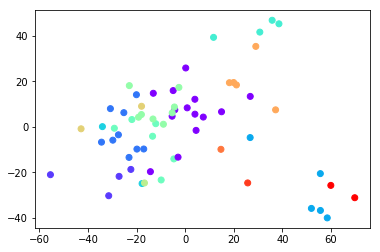

In [52]:
cluster_complete = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='complete')
predict_complete=cluster_complete.fit_predict(X_scale)
plt.clf() 
plt.scatter(df1['x'], df2['y'], c=predict_complete, cmap='rainbow')

**Average**

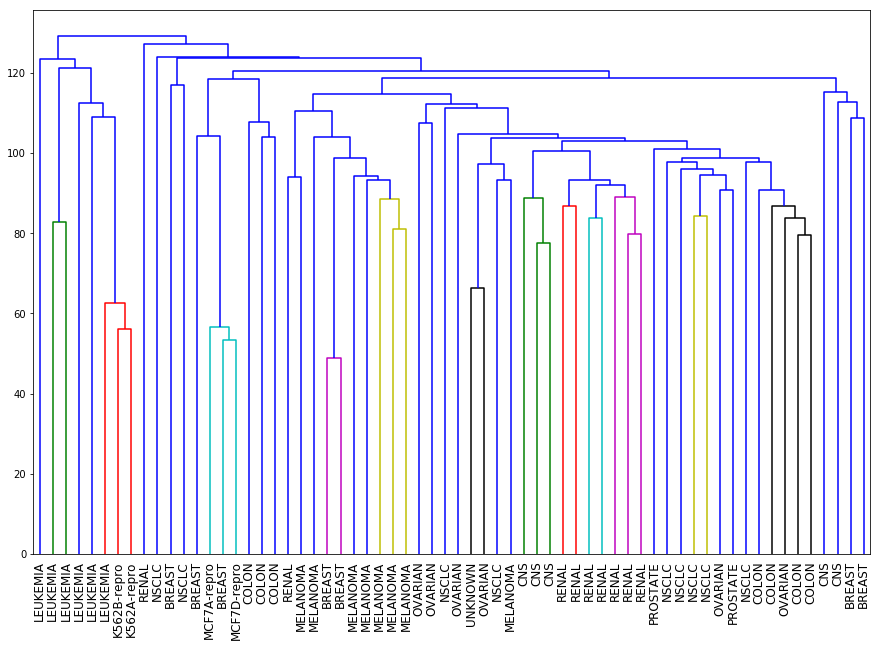

In [88]:
plt.figure(figsize=(15,10))
dend_average = shc.dendrogram(shc.linkage(X_scale, method='average'),labels=df1.index,leaf_font_size=12)

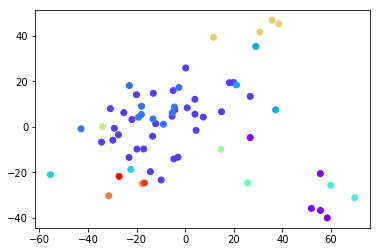

In [54]:
cluster_average = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='average')
predict_average=cluster_average.fit_predict(X_scale)
plt.clf() 
plt.scatter(df1['x'], df2['y'], c=predict_average, cmap='rainbow')

**Single**

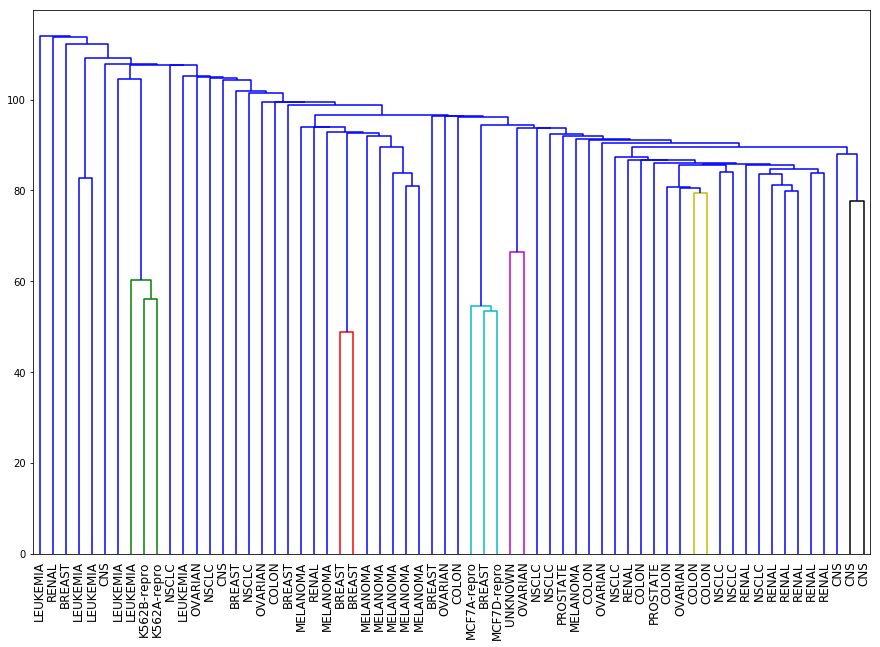

In [89]:
plt.figure(figsize=(15,10))
dend_single = shc.dendrogram(shc.linkage(X_scale, method='single'),labels=df1.index,leaf_font_size=12)

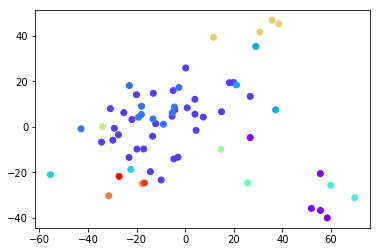

In [57]:
cluster_single = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='single')
predict_single=cluster_average.fit_predict(X_scale)
plt.clf() 
plt.scatter(df1['x'], df2['y'], c=predict_single, cmap='rainbow')

5. Use complete linkage for the remainder of the analysis.  Cluster the observations into 4 groups.  Look at the labels for each of the groups and comment on the success of the clustering.   

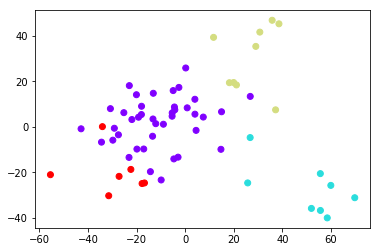

In [58]:
cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
predict_complete=cluster_complete.fit_predict(X_scale)
plt.clf() 
plt.scatter(df1['x'], df2['y'], c=predict_complete, cmap='rainbow')

In [60]:
pd.crosstab(df1['label'],predict_complete)

col_0,0,1,2,3
label,,,,
BREAST,2,0,2,3
CNS,3,0,0,2
COLON,2,0,5,0
K562A-repro,0,1,0,0
K562B-repro,0,1,0,0
LEUKEMIA,0,6,0,0
MCF7A-repro,0,0,1,0
MCF7D-repro,0,0,1,0
MELANOMA,8,0,0,0


6. Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. Perform hierarchical clustering on the first 5 principal component scores and comment on the results.   

In [65]:
pca = PCA(5)
pca.fit(X_scale)
X_PCA = pca.transform(X_scale)
pca.explained_variance_ratio_

array([0.11358942, 0.06756202, 0.05751842, 0.04247532, 0.03734932])

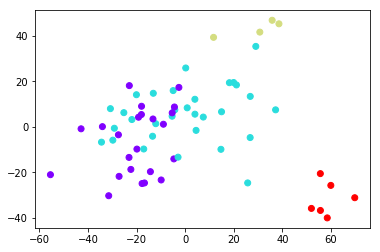

In [67]:
pca5=X_PCA[:,0:4]
cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
predict_complete=cluster_complete.fit_predict(pca5)
plt.clf() 
plt.scatter(df1['x'], df2['y'], c=predict_complete, cmap='rainbow')

In [68]:
pd.crosstab(df1['label'],predict_complete)

col_0,0,1,2,3
label,,,,
BREAST,5,0,2,0
CNS,5,0,0,0
COLON,0,7,0,0
K562A-repro,0,0,0,1
K562B-repro,0,0,0,1
LEUKEMIA,0,2,0,4
MCF7A-repro,0,0,1,0
MCF7D-repro,0,0,1,0
MELANOMA,7,1,0,0
